# 영상의 밝기 조절

In [1]:
import cv2
import numpy as np
import sys

In [54]:
# option 1. saturated 함수 사용
def saturated(value):  # value는 이미지 행렬 형태의 입력
    dst = value.copy()
    dst[value < 0] = 0 # 불리언 색인
    dst[value > 255] = 255    
    return dst # 이미지 행렬 형태로 반환    

src = cv2.imread("./data/lenna.bmp", cv2.IMREAD_GRAYSCALE)
src = np.array(src, dtype=np.int32)

dst = np.empty(src.shape, src.dtype)
dst = saturated(src + 100)

src = np.array(src, dtype=np.uint8)
dst = np.array(dst, dtype=np.uint8)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [55]:
# option 2. np.clip 사용

src = cv2.imread("./data/lenna.bmp", cv2.IMREAD_GRAYSCALE)
src = np.array(src, dtype=np.int32)
dst = np.empty(src.shape, dtype=src.dtype)

dst = np.clip(src+100, 0, 255) # 상한선과 하한선을 0과 255로 지정

src = np.array(src, dtype=np.uint8)
dst = np.array(dst, dtype=np.uint8)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [56]:
# option 3. cv2.add() : 포화연산까지도 포함해서 밝기값 조정

src = cv2.imread("./data/lenna.bmp", cv2.IMREAD_GRAYSCALE)
dst = cv2.add(src, 100)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [61]:
# Trackbar로 밝기 조정하기
def update(pos):
    dst = cv2.add(src, pos)
    cv2.imshow("dst", dst)

src = cv2.imread("./data/lenna.bmp", cv2.IMREAD_GRAYSCALE)

dst = src.copy()
cv2.imshow("dst", dst)

#cv2.createTrackbar(트랙바 이름, 윈도우 이름, 트랙바의 최저, 트랙바의 최고, 이벤트발생시 호출될 함수)
cv2.createTrackbar("brightness", "dst", 0, 100, update)

cv2.imshow("src", src)
cv2.waitKey()
cv2.destroyAllWindows()

# 영상의 명암비 조절

In [63]:
# 단순한 아이디어 - 상수를 곱해서 명암비 조절 : 포화연산으로 인해 효과가 별로 없음. 거의 사용하지 않음
src = cv2.imread("./data/lenna.bmp", cv2.IMREAD_GRAYSCALE)

s = 2 # 0.5
dst = cv2.multiply(src, s)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

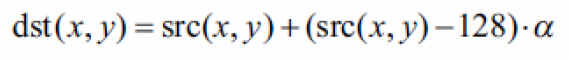

In [98]:
# 위의 수식을 이용한 방법
# 수식에 담긴 의미
# : 픽셀값128을 기준으로 상대적으로 어두운색(128이하)은 더 어둡게, 밝은색(128이상)은 더 밝게
# : alpha 값이 1이면 명암비가 커지고
# : alpha 값이 -0.5이면 명암비가 작아짐 : 어두운색이 밝아지고,밝은색이 어두워지므로 더 명암비가 낮아짐

src = cv2.imread("./data/lenna.bmp", cv2.IMREAD_GRAYSCALE)

alpha = 1.0

# 수식 : (src + (src - 128)* alpha)
# (src - 128)에서 이미 uint8 범위(0에서 255사이)를 넘어갈 수 있어서
# 수식 : (src + (src - 128.)* alpha)
# 위와같이 128을 실수로 만들면 타입 캐스팅 효과 -> float64
# 최종적으로는 cv2.imshow() 출력을 위해 다시 src 정수로 타입캐스팅(astype함수) -> np.uint8

dst = np.clip((src + (src - 128.)* alpha), 0, 255).astype(src.dtype)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

# cv2.imshow 내부에서
# src(이미지 행렬)이 0~1 사이의 값이면 data type 이 실수타입을 기대
# src(이미지 행렬)이 0~255 사이의 값이면 data type 이 정수타입을 기대

In [96]:
# cv2.subtract를 사용했을 경우 위와 결과가 다름 (두번의 포화연산이 적용되서)
# tmp = cv2.add(src, (cv2.subtract(src, 128)*alpha).astype(src.dtype))

dtype('uint8')

# 히스토그램 분석

### 히스토그램 구하기 (간단한 행렬)

In [101]:
src = np.array([[0, 0, 0, 0],
          [1, 2, 3, 5],
          [6, 1, 2, 3],
          [4, 3, 1, 7]], dtype=np.uint8) # src : 4x4 의 1 channel 영상

In [105]:
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[8], ranges=[0, 8])
hist1 # 0의 빈도수 4개, 1의 빈도수 3개, 2의 빈도수 2개.....

array([[4.],
       [3.],
       [2.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [106]:
hist2 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[4], ranges=[0, 8])
hist2 # 0과 1의 빈도수 7개, 2와 3의 빈도수 5개.....

array([[7.],
       [5.],
       [2.],
       [2.]], dtype=float32)

In [107]:
hist3 = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[4], ranges=[0, 4])
hist3 # 0과 4개, 1의 빈도수 3개, 2의 빈도수 2개, 3의 빈도수 3개.

array([[4.],
       [3.],
       [2.],
       [3.]], dtype=float32)

### 히스토그램 구하기 (lena 이미지)

In [ ]:
import matplotlib.pyplot as plt

In [108]:
# histSize (=bins) : 32
src = cv2.imread("./data/lenna.bmp", cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[32], ranges=[0, 255])

print(hist.sum() == src.shape[0] * src.shape[1])

plt.plot(hist, color='r')
plt.bar(np.arange(32), hist.flatten(), color='b')

True


<BarContainer object of 256 artists>

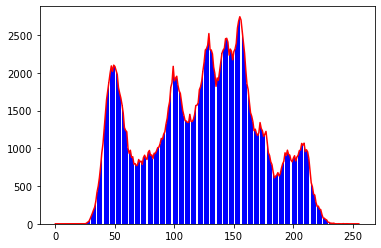

In [125]:
# histSize (=bins) : 256
src = cv2.imread("./data/lenna.bmp", cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0, 255])

print(hist.sum() == src.shape[0] * src.shape[1])

plt.plot(hist, color='r')
plt.bar(np.arange(256), hist.flatten(), color='b')

### 컬러 채널별 히스토그램 구하기 (lena 이미지)

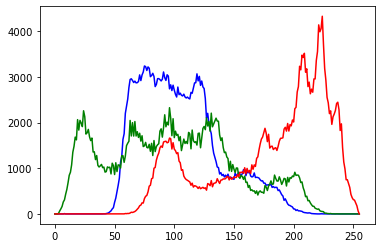

In [137]:
src = cv2.imread("./data/lenna.bmp", cv2.IMREAD_COLOR)

color = ["b", "g", "r"]
for i in range(3):
    hist = cv2.calcHist(images=[src], channels=[i], mask=None, histSize=[256], ranges=[0, 255])
    plt.plot(hist, color=color[i])    

In [136]:
cv2.imshow("src", src)
cv2.waitKey()
cv2.destroyAllWindows()

### 히스토그램 스트레칭(Grayscale Image)

In [139]:
# min_max scaling (정규화)
a = np.arange(12).reshape(4, 3)

(a - a.min())/(a.max() - a.min())

In [154]:
# minVal, maxVal, minPos, maxPos = cv2.minMaxLoc(src)
# minVal, maxVal, minPos, maxPos

(107.0, 218.0, (202, 48), (317, 69))

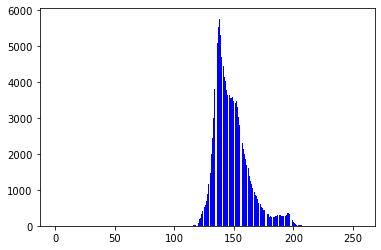

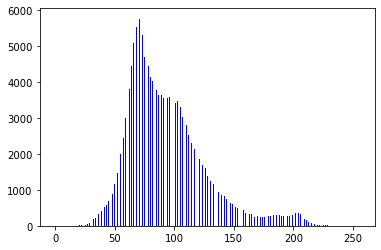

In [153]:
src = cv2.imread("./data/hawkes.bmp", cv2.IMREAD_GRAYSCALE)

dst = (src - src.min())/(src.max() - src.min()) * 255
dst = np.array(dst, dtype=np.uint8)

src_hist = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0, 255])
dst_hist = cv2.calcHist(images=[dst], channels=[0], mask=None, histSize=[256], ranges=[0, 255])

plt.bar(np.arange(256), src_hist.flatten(), color='b')
plt.show()

plt.bar(np.arange(256), dst_hist.flatten(), color='b')
plt.show()

In [152]:
cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

### 히스토그램 평활화 (Grayscale Image)

In [156]:
src = cv2.imread("./data/hawkes.bmp", cv2.IMREAD_GRAYSCALE)

dst = cv2.equalizeHist(src) # dst = round(H(src(x, y)) * L_max/N)

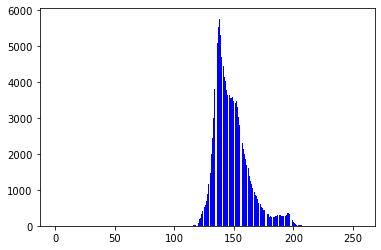

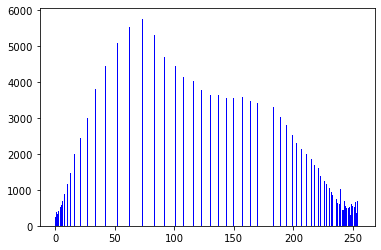

In [158]:
src_hist = cv2.calcHist(images=[src], channels=[0], mask=None, histSize=[256], ranges=[0, 255])
dst_hist = cv2.calcHist(images=[dst], channels=[0], mask=None, histSize=[256], ranges=[0, 255])

plt.bar(np.arange(256), src_hist.flatten(), color='b')
plt.show()

plt.bar(np.arange(256), dst_hist.flatten(), color='b')
plt.show()

In [157]:
cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

### 히스토그램 평활화 (Color Image)

In [161]:
# 1. 컬러 이미지 히스토그램 평활화 : 잘못된 예
src = cv2.imread("./data/pepper.bmp")

b = src[:, :, 0]
g = src[:, :, 1]
r = src[:, :, 2]
# b, g, r= cv2.split(src)

dst_b = cv2.equalizeHist(b)
dst_g = cv2.equalizeHist(g)
dst_r = cv2.equalizeHist(r)

dst = cv2.merge([dst_b, dst_g, dst_r])

cv2.imshow("src", src)
cv2.imshow("dsr", dst)
cv2.waitKey()
cv2.destroyAllWindows()

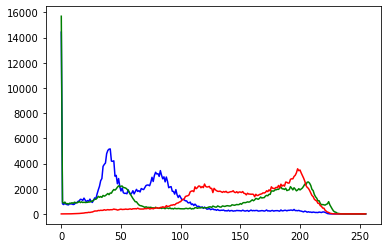

In [167]:
# 평활화 전 각 채널의 히스토그램 분포
color = ["b", "g", "r"]
for i in range(3):
    hist = cv2.calcHist(images=[src], channels=[i], mask=None, histSize=[256], ranges=[0, 255])
    plt.plot(hist, color=color[i]) 

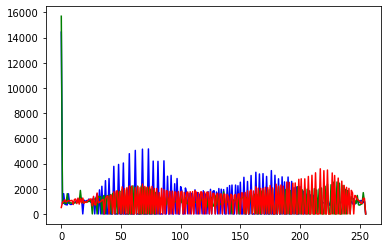

In [169]:
# 평활화 후 각 채널의 히스토그램 분포
dst_b_hist = cv2.calcHist(images=[dst_b], channels=[0], mask=None, histSize=[256], ranges=[0, 255])
dst_g_hist = cv2.calcHist(images=[dst_g], channels=[0], mask=None, histSize=[256], ranges=[0, 255])
dst_r_hist = cv2.calcHist(images=[dst_r], channels=[0], mask=None, histSize=[256], ranges=[0, 255])

plt.plot(dst_b_hist, color="b") 
plt.plot(dst_g_hist, color="g") 
plt.plot(dst_r_hist, color="r") 

In [171]:
# 2. 컬러 이미지 히스토그램 평활화 : 잘 된 예
# 명암비를 조정한다는것은 "밝기"값하고만 상관이 있음
src = cv2.imread("./data/pepper.bmp")
src_yCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb) # YCrCb : Y(밝기 정보), Cr(붉은색 색상정보), Cb(푸른색 색상정보)

y, Cr, Cb = cv2.split(src_yCrCb)

y_equalized = cv2.equalizeHist(y) # 밝기 정보만을 담고 있는 y 채널에 대해서만 평활화를 수행

dst_yCrCb = cv2.merge([y_equalized, Cr, Cb])

dst = cv2.cvtColor(dst_yCrCb, cv2.COLOR_YCrCb2BGR)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()


# 영상의 산술 연산

In [181]:
src1 = cv2.imread("./data/lenna256.bmp", cv2.IMREAD_GRAYSCALE) 
src2 = cv2.imread("./data/square.bmp", cv2.IMREAD_GRAYSCALE)


dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0.0 )
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

cv2.imshow("src1", src1)
cv2.imshow("src2", src2)
cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)
cv2.imshow("dst3", dst3)
cv2.imshow("dst4", dst4)

cv2.waitKey()
cv2.destroyAllWindows()

# 영상의 논리 연산

In [185]:
src1 = cv2.imread("./data/lenna256.bmp", cv2.IMREAD_GRAYSCALE) 
src2 = cv2.imread("./data/square.bmp", cv2.IMREAD_GRAYSCALE)

dst1 = cv2.bitwise_and(src1, src2)
dst2 = cv2.bitwise_or(src1, src2)
dst3 = cv2.bitwise_xor(src1, src2)
dst4 = cv2.bitwise_not(src1)

cv2.imshow("src1", src1)
cv2.imshow("src2", src2)
cv2.imshow("dst1", dst1)
cv2.imshow("dst2", dst2)
cv2.imshow("dst3", dst3)
cv2.imshow("dst4", dst4)

cv2.waitKey()
cv2.destroyAllWindows()

(참고) 영상의 이진화

In [194]:
def on_threshold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow("dst", dst)

In [200]:
src = cv2.imread("./data/neutrophils.png", cv2.IMREAD_GRAYSCALE)

cv2.imshow("src", src)
cv2.imshow("dst", dst)

cv2.createTrackbar("threhold", "dst", 0, 255, on_threshold)
cv2.setTrackbarPos("threhold", "dst", 128)
cv2.waitKey()
cv2.destroyAllWindows()

### Workshop : bitwise 연산 , 이진화

In [271]:
# option 1
airplane = cv2.imread('./data/airplane.bmp', cv2.IMREAD_COLOR) # color
field = cv2.imread('./data/field.bmp', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(airplane, cv2.COLOR_BGR2GRAY) # bgr -> gray : mask를 만들기 위해서

_, mask = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

airplane_fg = np.zeros(airplane.shape, airplane.dtype)
airplane_fg[mask_inv>0] = airplane[mask_inv>0] # mask_inv>0 : foreground 부분이 흰색

field_bg = np.zeros(field.shape, field.dtype)
field_bg[mask>0] = field[mask>0] #mask>0 : background 부분이 흰색

dst = cv2.bitwise_or(airplane_fg, field_bg)

cv2.imshow("airplane", airplane)
cv2.imshow("field", field)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# option 2

airplane = cv2.imread("./data/airplane.bmp", cv2.IMREAD_COLOR)
field = cv2.imread("./data/field.bmp", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(airplane, cv2.COLOR_BGR2GRAY) # bgr -> gray : mask를 만들기 위해서

_, mask = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

airplane_fg = cv2.bitwise_and(airplane, airplane, mask=mask_inv)
field_bg = cv2.bitwise_and(field, field, mask=mask)
                           
dst = cv2.bitwise_or(airplane_fg, field_bg)

cv2.imshow("airplane", airplane)
cv2.imshow("field", field)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [283]:
# option 3

airplane = cv2.imread("./data/airplane.bmp", cv2.IMREAD_COLOR)
field = cv2.imread("./data/field.bmp", cv2.IMREAD_COLOR)

gray = cv2.cvtColor(airplane, cv2.COLOR_BGR2GRAY)

_, mask = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY)

field[mask < 255] = airplane[mask < 255]

cv2.imshow("airplane", airplane)
cv2.imshow("field", field)
cv2.imshow("mask", mask)

cv2.waitKey()
cv2.destroyAllWindows()

In [286]:
# option 4
src = cv2.imread('./data/airplane.bmp', cv2.IMREAD_COLOR)
dst = cv2.imread('./data/field.bmp', cv2.IMREAD_COLOR)

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

_, mask = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY_INV)

dst[mask>0] = src[mask>0]

cv2.imshow('mask', mask)
cv2.imshow('src', src)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()


# 영상의 필터링

## 엠보싱 필터

In [294]:
src = cv2.imread("./data/rose.bmp", cv2.IMREAD_GRAYSCALE)

emboss = np.array([[-1, -1, 0],
                   [-1, 0, 1],
                   [0, 1, 1]], np.float32)


# 마스크 연산
dst = cv2.filter2D(src, -1, emboss, delta=128) # -1은 입력 영상과 결과 영상의 채널 깊이가 동일하다는 뜻
                                               # delta=128은 전체 영상의 값이 마스크 연산과정에서 작아짐
                                               # 128을 더해줌으로 전반적으로 밝게 표시해주는 효과

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()